# Ejercicio:

-Con la problemática anterior, construya una metodología la cual analice si realmente dicho modelo también sirve con datosque no fueron usados para ajustar el algoritmo.

Tips: Recuerda el análisis de overfitting y underfitting visto en clase.

Ahora, ya tenemos más herramientas de evaluación para analizar la effectividad del modelo.

-Use las métricas de evaluación vistas en la clase de hoy y anteriores, para sacar más conclusiones sobre la efectividad del modelo.

con lo anterior, responda:

- ¿Resulta mejor usar un método aleatorio para solucionar este problema (que tecnicamente seria decirle al oráculo de la mitología griega cuándo nacerá la gallina del huevo)?, ¿Qué métrica puede solucionar esta pregunta?

- ¿ Este modelo es sensible a falsos negativos?, numéricamente hablando es: ¿significativo, o despeciable dicha sensibilidad?
    ¿Qué métrica me ayuda a resolver este problema?
    
- Si el director principal de la casa de moneda de argentina, ve el primer score de mi modelo que es de 0.999, luego me dice que pase dicho modelo a la base de datos general para obtener predicciones ya que dicho modelo es perfecto. ¿Cómo le explicarías que dicho modelo posiblemente puede tener problemas con nuevos datos y por qué? 

In [172]:
import numpy as np
import pandas as pd

In [173]:
df = pd.read_csv("conversiones.csv")

In [174]:
df

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,Si
1,0.151,0.079,2,8,1,Si
2,0.384,0.324,4,9,1,Si
3,0.200,0.192,4,9,1,Si
4,0.415,0.020,2,8,1,Si
...,...,...,...,...,...,...
319941,0.148,0.906,1,10,6,No
319942,0.238,0.872,3,16,3,No
319943,0.026,0.376,2,9,5,No
319944,0.617,0.232,4,4,6,No


In [175]:
df["Conversion"] = pd.Categorical(df["Conversion"]).codes

In [176]:
df

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,1
1,0.151,0.079,2,8,1,1
2,0.384,0.324,4,9,1,1
3,0.200,0.192,4,9,1,1
4,0.415,0.020,2,8,1,1
...,...,...,...,...,...,...
319941,0.148,0.906,1,10,6,0
319942,0.238,0.872,3,16,3,0
319943,0.026,0.376,2,9,5,0
319944,0.617,0.232,4,4,6,0


In [177]:
df.columns

Index(['Costo1', 'Costo2', 'Topico', 'Quincena', 'TipoProducto', 'Conversion'], dtype='object')

In [178]:
y = df["Conversion"]
X = df[['Costo1', 'Costo2', 'Topico', 'Quincena', 'TipoProducto']]

In [179]:
X

,Costo1,Costo2,Topico,Quincena,TipoProducto
0,0.341,0.299,2,7,1
1,0.151,0.079,2,8,1
2,0.384,0.324,4,9,1
3,0.200,0.192,4,9,1
4,0.415,0.020,2,8,1
...,...,...,...,...,...
319941,0.148,0.906,1,10,6
319942,0.238,0.872,3,16,3
319943,0.026,0.376,2,9,5
319944,0.617,0.232,4,4,6


In [180]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
Costo1,1.000000,0.292435,0.009686,-0.054991,0.019285,-0.560846
Costo2,0.292435,1.000000,-0.001919,-0.123977,0.148189,-0.497512
Topico,0.009686,-0.001919,1.000000,-0.131517,-0.030236,-0.026247
Quincena,-0.054991,-0.123977,-0.131517,1.000000,-0.143375,0.053139
TipoProducto,0.019285,0.148189,-0.030236,-0.143375,1.000000,-0.001374
Conversion,-0.560846,-0.497512,-0.026247,0.053139,-0.001374,1.000000


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [182]:
#División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Escalamiento de los datos
scl = StandardScaler()
X = scl.fit_transform(X)

#Entrenamiento del modelo
knn_modelo = KNeighborsClassifier(n_neighbors=5) 
knn_modelo.fit(X_train, y_train)

#Predicción en el conjunto de testeo
y_pred = knn_modelo.predict(X_test)

#Evaluación del rendimiento con la exactitud
Exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {Exactitud:.2f}')

#Evaluación del rendimiento con Precisión
Precision = precision_score(y_test, y_pred, average= None)
print('Precisión:', Precision)

#Evaluación del rendimiento con Recall 
Sensibilidad = recall_score(y_test, y_pred, average= None)
print('Sensibilidad:',Sensibilidad)

#Evaluación del rendimiento con F1-Score
F1S = f1_score(y_test, y_pred, average= None)
print('F1Score:', F1S)

#Evaluación del rendimiento con Matriz de Confusión
matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:', matrix)

Exactitud: 0.98
Precisión: [0.99774192 0.95665959]
Sensibilidad: [0.95462943 0.99784732]
F1Score: [0.97570967 0.97681947]
Matriz de Confusión: [[30488  1449]
 [   69 31984]]


In [183]:
import matplotlib.pyplot as plt

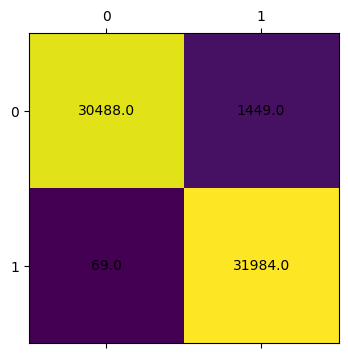

In [184]:
fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

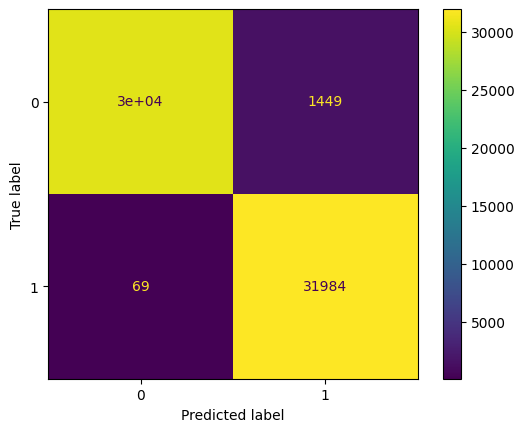

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()